# WEEK 6 TUTORIAL

In [1]:
import os
import pandas as pd
os.chdir("C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2")
os.getcwd()

'C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2'

In [2]:
import numpy
import matplotlib.pyplot as pl
import regressiondemo as rd
%matplotlib inline

In [3]:
# The "true" function of x with range fixed at [0,10]
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

Text(0.5, 0, 'x')

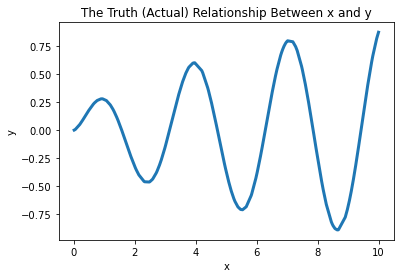

In [4]:
# Create 200 x-values using the regressiondemo.py function called makeX()
xts = rd.makeX(200)
# Use the truefunc() to create the matching y-values that fit
# that true equation
yts = truefunc(xts)
pl.plot(xts, yts, label = 'truth', linewidth=3.0)
pl.title("The Truth (Actual) Relationship Between x and y")
pl.ylabel('y')
pl.xlabel('x')

In [5]:
# Don't make more than 100 points for this demo
points = 30
# The regressiondemo.py provides settings for noise level
# creation using standard deviation as the input
rd.setSigma(0.2)
# Let's create some (x,y) points, x being the independent
# variable. The difference from the earlier makeX is that
# we now use the 'points' variable.
x = rd.makeX(points)
# y-values are based on the truefunc(x) but we want to add
# some noise to it.
y = rd.addNoise(truefunc(x))

### PRACTISE 1

Scatter plot the simulated data collection.

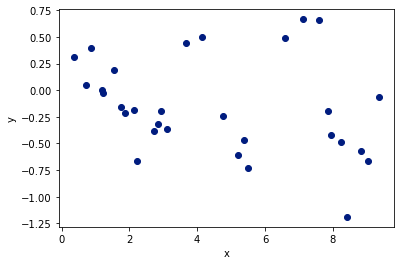

In [6]:
pl.style.use('seaborn-dark-palette')
pl.scatter(x,y)
pl.ylabel('y')
pl.xlabel('x')
pl.show()

Text(0.5, 0, 'x')

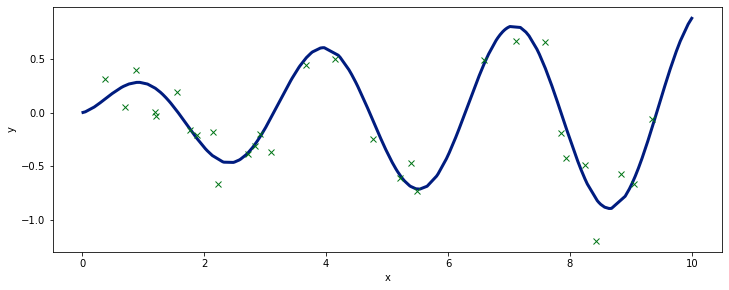

In [7]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])
# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=3.0)
# Plot the simulated collected data
pl.plot(x, y, 'x')
pl.ylabel('y')
pl.xlabel('x')

In [8]:
# Build a set of polynomial orders to use to fit
# Note that the regressiondemo.py has a function makeOrders()
# that takes in the number of points we have and create
# a set of orders (polynomial orders in this case)
orders = rd.makeOrders(points)
print('Fitting polynomials of orders = ', orders)

Fitting polynomials of orders =  [3, 6, 12, 25]


### PRACTISE 2

What’s the output of the print statement?

In [9]:
print("Fitting polynomials of orders =  [3, 6, 12, 25]")

Fitting polynomials of orders =  [3, 6, 12, 25]


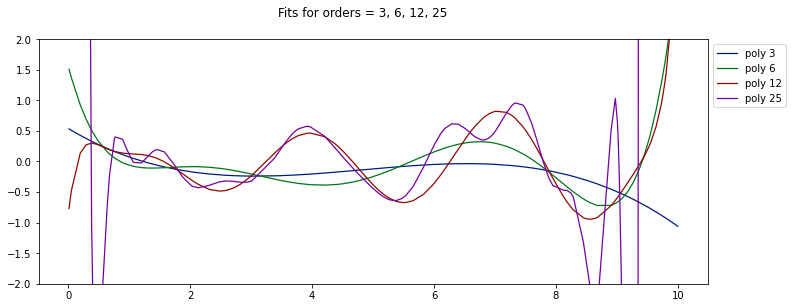

In [10]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])
# If fitting goes a bit wild, need to constrain what y's are plotted
# Uncomment the following line and re-run this cell
pl.ylim(-2, 2)
# We now create a linear regression for each of the order
for order in orders:
# Using the linear regression function in regressiondemo.py.
# Again, note that this is for illustration purposes, for any
# exercises, assignments, assessment, this is not to be used.
    ys = rd.linReg(x, y, xts, order)
# Plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1.25)
# We want to have the legend for the lines
    pl.legend(bbox_to_anchor=(1, 1))
    pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

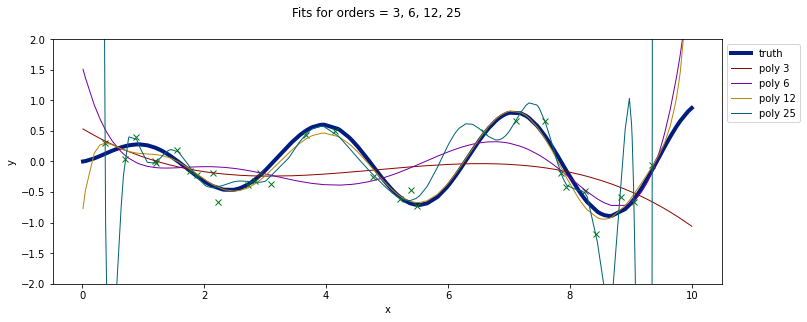

In [11]:
# Make a larger canvas size
pl.figure(figsize=[12,4.5])
# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=4) # default is green line?
# Plot the simulated collected data
pl.plot(x, y, 'x')
pl.ylabel('y')
pl.xlabel('x')
# Build a set of polynomial orders to use to fit
orders = rd.makeOrders(points)
pl.ylim(-2, 2)
for order in orders:
# Using the linear regression function in regressiondemo.py.
    ys = rd.linReg(x, y, xts, order)
# Plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
# We want to have the legend for the lines
    pl.legend(bbox_to_anchor=(1, 1))
    pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

### PRACTISE 3

● What do you see from the plots with the different polynomial dimensions (orders)?

● How well do higher dimensional polynomials work?

● Which order seems to give the best fit?

Fitting polynomials of orders =  [3, 6, 12, 25]


Text(0.5, 0.98, 'Best possible fits')

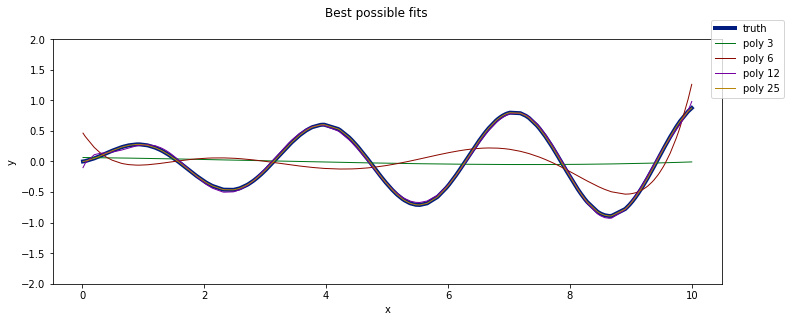

In [12]:
# Plot the truth
pl.figure(figsize=[12,4.5])
pl.plot(xts, yts, label = 'truth', linewidth = 4)
pl.ylabel('y')
pl.xlabel('x')
print ("Fitting polynomials of orders = ", orders)
for order in orders:
    ys = rd.bestLinReg(truefunc,xts,order)
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
pl.ylim(-2,2)
pl.legend(bbox_to_anchor=(1.1, 1.1))
pl.suptitle('Best possible fits')

These curves represent the (near) best fits one can do to the "truth" with different orders of polynomials.

These best fits are in the sense of "least squares", the least squared error averaged over the x-range. When fitting to finite samples, one will get more or less close to these best fits, the less data one has then generally the worse the fit will be.

## MODEL BIAS

Model family: 
A model family is a class of models characterised by some higher order parameters, usually called hyper-parameters. In the 2-D linear regressions here, the hyper- parameter is the order. This leads to particular members of the family, 4-th order linear regression in 2-D, 10-th order linear regression in 2-D, etc. To instantiate one of these to get a particular model instance or function, we need to give the coefficients to it. So an instance of 4-th order linear regression in 2-D would be fully instantiated with the 5 coefficients (1, 1, 0.5, 0.2, 0.1), one for the constant term and 4 for the powers.

Bias: how close can a particular member of the model family fit a particular "truth". So for the curve sin(x) on some range [0,5], how close can one get with a 4-th order polynomial or a 10-th order polynomial? We plotted the best fits in the previous cell.

Large bias models: so small order polynomials can never fit the sin(x) function very well. These members of the linear regression family are said to have large bias.

Small bias models: so large order polynomials can usually fit the sin(x) function much better. These members of the linear regression family are said to have small bias.

##### In general, simple models will have a large bias, and complex models will have a small bias.

### PRACTISE 4

Do we always go with the most complex models? In this case the highest possible
polynomial?

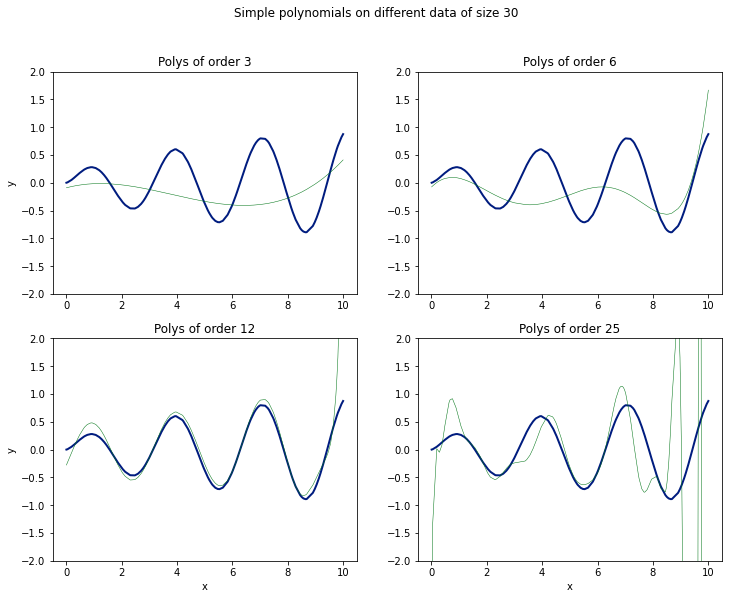

In [13]:
points = 30
orders = rd.makeOrders(points)
# This activity is also to show how you can plot a few graphs
# in one plot. Here we do a 2x2 plot, so need four orders to fit
fourorders = orders[-4:]
setcount = 6
pl.figure(figsize=[12,9])
pl.suptitle('Simple polynomials on different data of size '+ str(points))
# Goes through an iteration to plot multiple graphs into one
for i in range(0, setcount-1):
# Generate a sample for each graph
    xb = rd.makeX(points)
    yb = rd.addNoise(truefunc(xb))
# To obtain the position in the subplot
    sp = 1;
for order in fourorders:
        pl.subplot(2,2,sp)
        sp += 1
# plot the truth
        pl.plot(xts, yts, linewidth = 2) # default is green line?
# Just for the axes to be labelled
        if sp>3:
            pl.xlabel('x')
        if sp%2==0:
            pl.ylabel('y')
        ys = rd.linReg(xb,yb,xts,order)
        pl.title('Polys of order ' + str(order))
# Plot fitted curve
        pl.plot(xts, ys, linewidth = 0.5 )
# The y range for the plot has to be altered depending on the data
        pl.ylim(-2,2)